# Introduction to Convolutional Neural Networks and Computer Vision with TensorFLow

Computer vision is a practice of writing algorithms which can discover patterns in visual data, Such as the camera of a self driving car recognizing the car in the front

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-01 10:47:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   165MB/s    in 0.6s    

2024-04-01 10:47:18 (165 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (becoming one with it)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images = len(os.listdir('pizza_steak/train/steak'))
num_steak_images

750

To visualize our images first get the class names programically

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names for the subdirectories
print(class_names)

['pizza' 'steak']


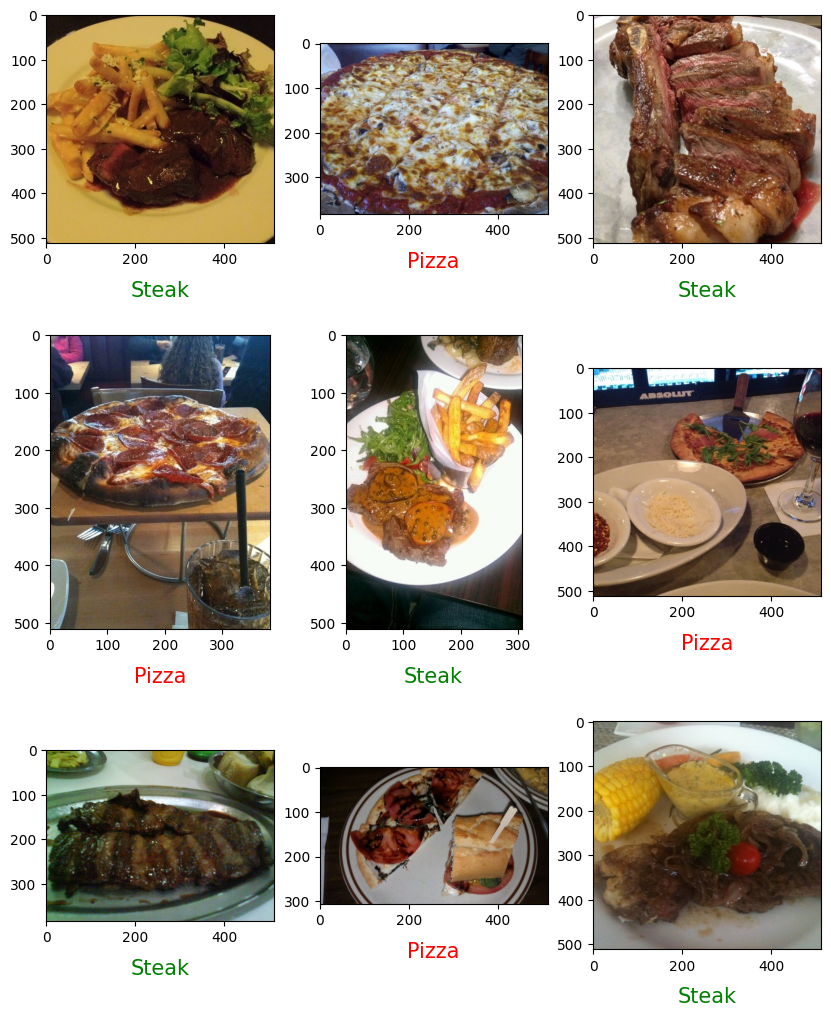

In [ ]:
# Let's visualize out images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

font_size = 15
labelpad = 10
steak_folder = 'pizza_steak/train/steak'
pizza_folder = 'pizza_steak/train/pizza'
plt.figure(figsize = (10, 13))
for i in range(9):
  if i%2 == 0:
    plt.subplot(3, 3, i+1)
    random_img_steak = random.sample(os.listdir(steak_folder), 1)
    img = mpimg.imread(steak_folder + '/' + random_img_steak[0])
    plt.imshow(img)
    plt.xlabel('Steak', fontsize = font_size, color = 'green', labelpad = labelpad)
  else:
    plt.subplot(3, 3, i+1)
    random_img_pizza = random.sample(os.listdir(pizza_folder), 1)
    img = mpimg.imread(pizza_folder + '/' + random_img_pizza[0])
    plt.imshow(img)
    plt.xlabel('Pizza', fontsize = font_size, color = 'red', labelpad = labelpad)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(28)

# Preprocess data (get all of the pixel values between 0 and 1 (normalization))
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setting up our path to directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (228, 228),
                                               class_mode = 'binary',
                                               seed = 28)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (228, 228),
                                               class_mode = 'binary',
                                               seed = 28)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 10,
                                 kernel_size = 3,
                                 activation = 'relu',
                                 input_shape = (228, 228, 3)))
model.add(tf.keras.layers.Conv2D(10, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                    padding = 'valid'))
model.add(tf.keras.layers.Conv2D(10, 3, activation = 'relu'))
model.add(tf.keras.layers.Conv2D(10, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling our model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(train_data, epochs = 5, validation_data = valid_data, steps_per_epoch = len(train_data), validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 163ms/step - loss: 0.5882 - accuracy: 0.6767 - val_loss: 0.5119 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4420 - accuracy: 0.8020 - val_loss: 0.3640 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3895 - accuracy: 0.8300 - val_loss: 0.3617 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3590 - accuracy: 0.8453 - val_loss: 0.3275 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3094 - accuracy: 0.8773 - val_loss: 0.3083 - val_accuracy: 0.8640


In [ ]:
model.save('Model_1.h5', save_format = 'h5')
np.save('Model_1_history.npy', history.history)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                   

## Using the same model as before

In [ ]:
# Set the random seed
tf.random.set_seed(28)

# Create a model for experimentation
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape = (228, 228, 3)))
model_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                       validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 0.7969 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Creating a summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 155952)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 623812    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 623837 (2.38 MB)
Trainable params: 623837 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.save('Model_2.h5', save_format = 'h5')
np.save('Model_2_history.npy', history_2.history)

In [ ]:
# Importing the saved history
from google.colab import files

files.upload()

In [ ]:
# Loading the saved history
import numpy as np
import pandas as pd

model_1_history = np.load('/content/Model_1_history.npy', allow_pickle = True).item()
model_2_history = np.load('/content/Model_2_history.npy', allow_pickle = True).item()

In [2]:
# Plotting the Loss - Epooch graph between then
def graph_plot(n = 1, fontsize = 10, **kwargs):
  fig, ax = plt.subplots(n, 1, figsize = (5, 10))
  for i in range(n):
    model_var = kwargs.get(f'model_{i+1}_history')
    if model_var is not None:
      ax[i].plot(pd.DataFrame(model_var['loss']))
      model_name = f'Model_{i+1}'
      ax[i].set_title(model_name)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      ax[i].legend(['Loss'])
      ax[i].spines['top'].set_visible(False)
      ax[i].spines['right'].set_visible(False)
      plt.tight_layout()

  fig.suptitle('Epochs-Loss Curve', fontsize = fontsize)
  plt.tight_layout()
  plt.show()



In [ ]:
# Creating a new model
import tensorflow as tf
# Set the random seed
tf.random.set_seed(28)

# Creating a model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape = [228, 228, 3]))
model_3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Compiling the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

# Saving the model history
np.save('Model_3_history.npy', history_3.history)

Epoch 1/5
47/47 [==============================] - 7s 109ms/step - loss: 2.9142 - accuracy: 0.6160 - val_loss: 0.7201 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 1.3220 - accuracy: 0.6867 - val_loss: 0.9591 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.7583 - accuracy: 0.7333 - val_loss: 0.4816 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6355 - accuracy: 0.7427 - val_loss: 0.4772 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5682 - accuracy: 0.7593 - val_loss: 0.4853 - val_accuracy: 0.7720


In [ ]:
model_3.summary()
model_3_history = history_3.history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 155952)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15595300  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15615601 (59.57 MB)
Trainable params: 15615601 (59.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


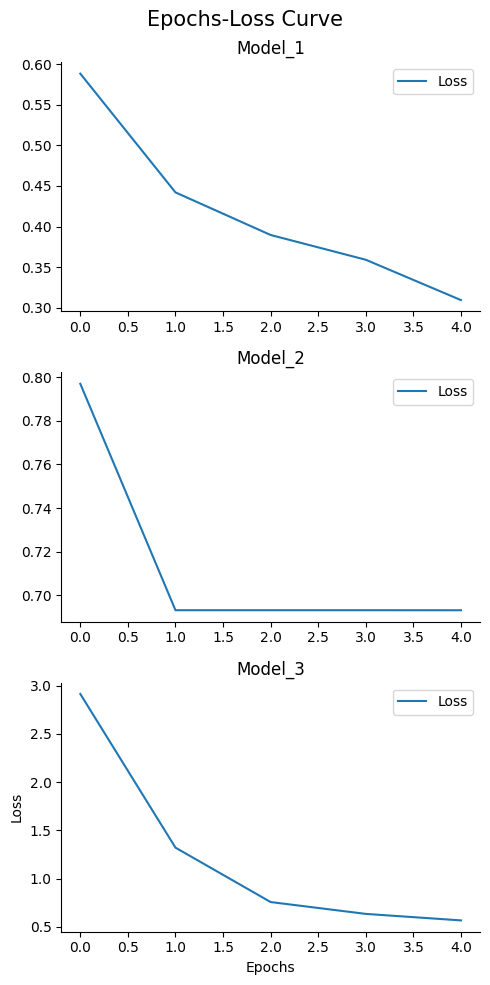

In [ ]:
graph_plot(model_1_history = model_1_history, model_2_history = model_2_history, model_3_history = model_3_history, n = 3, fontsize = 15)

## Binary Classification: Breaking it down
1. Become one with the data(visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (starting with a baseline)
4. Fit the model
5. Evaluate thw model
6. Adjust different parameters
7. Repeat until satisfied

### Become one with the data

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Creating a function to visualize an image of either steak or pizza
def view_random_image(dir, name):
      random_img_chooser = random.sample(os.listdir(dir + name), 1)
      img = mpimg.imread(os.path.join(dir, name) + '/' + random_img_chooser[0])
      print(f'{name}:\n', random_img_chooser)
      print(f'Image Shape of {name}:\n', img.shape)
      print('\t')
      plt.imshow(img)
      plt.title(name, fontsize = 10)
      plt.axis('off')

steak:
 ['2859933.jpg']
Image Shape of steak:
 (512, 512, 3)
	
pizza:
 ['2990023.jpg']
Image Shape of pizza:
 (384, 512, 3)
	


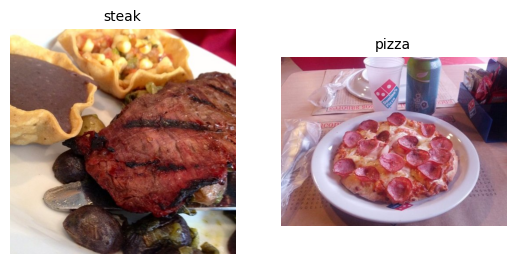

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess our data

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Next step involves changing our data to batches so that the model rather looking at all the data can look at batches of data and learn.

In [3]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [10]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, target_size = (228, 228),
                                               class_mode = 'binary', batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir, target_size = (228, 228),
                                             class_mode = 'binary', batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Setting the value for i to choose an image number from the batch
i = 5

In [ ]:
# Get the first image
images[i], images[i].shape

Text(0.5, 1.0, 'pizza')

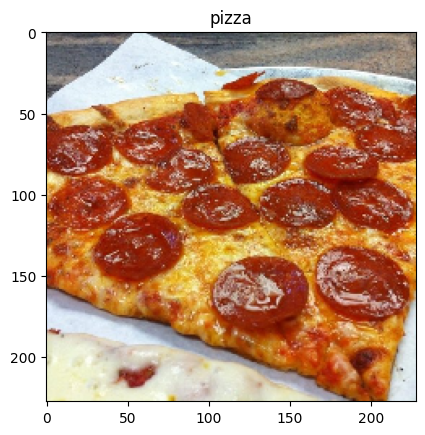

In [ ]:
# plotting the image using `.imshow()`
plt.imshow(images[i])
plt.title('pizza' if labels[i] == 0.0 else 'steak')

### Create a CNN model (start with a baseline)

In [4]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from tensorflow.keras import Sequential
from tensorflow.random import set_seed as SEED

In [ ]:
# Setting up a random seed
SEED(28)

# Creating the model
model = Sequential(name = 'Model_1')
model.add(Conv2D(filters = 28,
                 kernel_size = 3,
                 strides = 2,
                 padding = 'valid',
                 input_shape = (228, 228, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Activation('relu'))
model.add(Conv2D(15, 2, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Activation('relu'))
model.add(Conv2D(12, 2, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid')) # Output layer

# Compiling the model
model.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(train_data, epochs = 10, steps_per_epoch = len(train_data),
                    validation_data = test_data, validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 8s 127ms/step - loss: 0.6547 - accuracy: 0.6020 - val_loss: 0.5884 - val_accuracy: 0.6780
Epoch 2/10
47/47 [==============================] - 5s 109ms/step - loss: 0.5371 - accuracy: 0.7433 - val_loss: 0.4450 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 6s 137ms/step - loss: 0.4468 - accuracy: 0.7933 - val_loss: 0.3622 - val_accuracy: 0.8600
Epoch 4/10
47/47 [==============================] - 5s 105ms/step - loss: 0.4213 - accuracy: 0.8087 - val_loss: 0.3404 - val_accuracy: 0.8580
Epoch 5/10
47/47 [==============================] - 6s 135ms/step - loss: 0.4048 - accuracy: 0.8200 - val_loss: 0.3378 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 5s 108ms/step - loss: 0.3866 - accuracy: 0.8360 - val_loss: 0.3457 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 5s 110ms/step - loss: 0.3815 - accuracy: 0.8407 - val_loss: 0.2965 - val_accuracy: 0.8920
Epoch 

In [ ]:
model.evaluate(test_data)

16/16 [==============================] - 1s 77ms/step - loss: 0.2743 - accuracy: 0.8920


[0.274336576461792, 0.8920000195503235]

In [ ]:
# Taking the summary of the model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 113, 113, 28)      784       
                                                                 
 activation (Activation)     (None, 113, 113, 28)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 28)        0         
 g2D)                                                            
                                                                 
 activation_1 (Activation)   (None, 56, 56, 28)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 15)        1695      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 15)        0         
 g2D)                                                      

<Figure size 500x500 with 0 Axes>

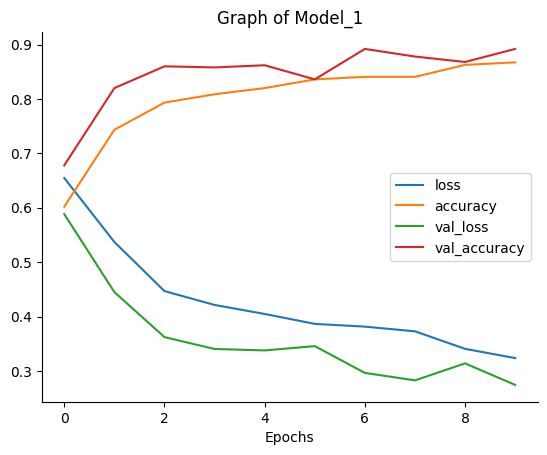

In [ ]:
import pandas as pd

# Plotting the graph of the model
plt.figure(figsize = (5, 5))
pd.DataFrame(history.history).plot()
plt.title('Graph of Model_1')
plt.xlabel('Epochs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
# Plotting the loss and accuracy differently for better understanding
def plot_graph_loss_acc(history):
  fig, ax = plt.subplots(2, 1, figsize = (5, 7))
  # Plot for loss
  ax[0].plot(pd.DataFrame(history.history['loss']), label = 'train')
  ax[0].plot(pd.DataFrame(history.history['val_loss']), label = 'valid')
  ax[0].legend()
  ax[0].set_title('Loss')

  # Plot for accuracy
  ax[1].plot(pd.DataFrame(history.history['accuracy']), label = 'train')
  ax[1].plot(pd.DataFrame(history.history['val_accuracy']), label = 'valid')
  ax[1].legend()
  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epochs', labelpad = 10)

  fig.suptitle('Loss & Accuracy for Train and Test')
  fig.tight_layout()

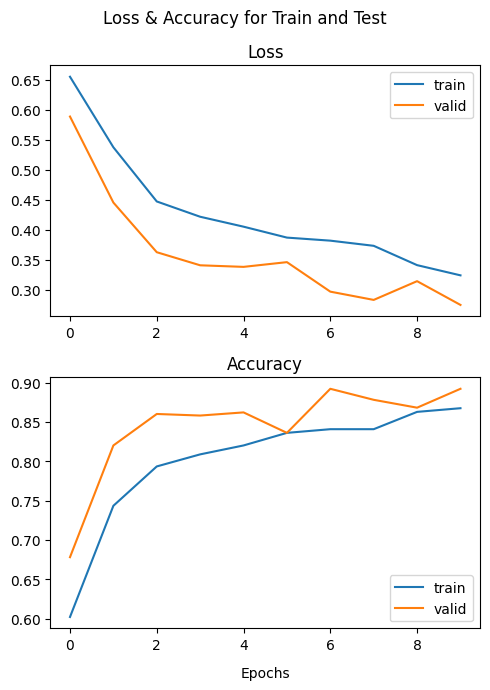

In [ ]:
plot_graph_loss_acc(history)

### Adjust the model parameters

Fitting the model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to output of our flattened layers

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [12]:
# Create ImageDataGenerator training
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., rotation_range = 0.2,
                                             shear_range = 0.2, zoom_range = 0.2,
                                             width_shift_range = 0.2, height_shift_range = 0.3,
                                             horizontal_flip = True)

In [13]:
# Import data and augment it from the directory
print('Augmented Data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, (228, 228),
                                                                   class_mode = 'binary', batch_size = 32,
                                                                   shuffle = False) # For demonstration only
print('Non-Augmented Data:')
train_data_original = train_datagen.flow_from_directory(train_dir, (228, 228),
                                                        class_mode = 'binary', batch_size = 32,
                                                        shuffle = False)

Augmented Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Data:
Found 1500 images belonging to 2 classes.


In [16]:
# Get some sample augmented data
aug_images, aug_labels = train_data_augmented.next()
non_aug_images, non_aug_labels = train_data_original.next()

In [14]:
# Creating a function to plot the augmented and non augmented image side by side
def plot_aug__non_aug(aug_img, aug_lbl, naug_img, naug_lbl, index = 0, n_img = 1):
  fig, ax = plt.subplots(n_img, 2, figsize = (5, n_img + 4))
  for i in range(n_img):
    if n_img > 1:
      for i in range(n_img):
        j = 0
        index = random.randint(0, 31)
        if i == 0:
          ax[i, j].text(0.95, -12, 'Original', color = 'green', fontsize = 10)
          ax[i, j + 1].text(0.95, -12, 'Augmented', color = 'red', fontsize = 10)
        ax[i, j].imshow(naug_img[index])
        ax[i, j].axis('off')
        ax[i, j + 1].imshow(aug_img[index])
        ax[i, j + 1].axis('off')
    else:
      ax[i].imshow(naug_img[index])
      ax[i].set_title('pizza' if aug_lbl[index] == 0.0 else 'steak')
      ax[i + 1].imshow(aug_img[index])
      ax[i + 1].set_title('pizza' if naug_lbl[index] == 0.0 else 'steak')

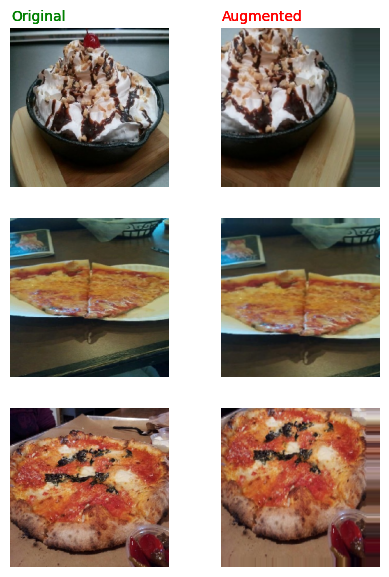

In [19]:
plot_aug__non_aug(aug_images, aug_labels, non_aug_images, non_aug_labels, index = 28, n_img = 3)

Now after augmented lets train a model on it to see how it benefits from augmented data

In [22]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   (228, 228),
                                                                   class_mode = 'binary',
                                                                   batch_size = 32,
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Creating a model
model_aug = Sequential(name = 'Model_AUG')
model_aug.add(Conv2D(32, 5, strides = 3, input_shape = (228, 228, 3), activation = 'relu'))
model_aug.add(MaxPool2D(3))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(28, 3, strides = 2, activation = 'relu'))
model_aug.add(MaxPool2D(2))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(28, 2, strides = 1, activation = 'relu'))
model_aug.add(MaxPool2D(2))
model_aug.add(Flatten())
model_aug.add(Dense(1, activation = 'sigmoid'))

# Compiling a model
model_aug.compile(loss = BCE(),
                  optimizer = Adam(),
                  metrics = ['accuracy'])

# Fitting the model
history_aug = model_aug.fit(train_data_augmented, epochs = 10, steps_per_epoch = len(train_data_augmented),
              validation_data = test_data, validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 444ms/step - loss: 0.6788 - accuracy: 0.5613 - val_loss: 0.6466 - val_accuracy: 0.6440
Epoch 2/10
47/47 [==============================] - 20s 415ms/step - loss: 0.6195 - accuracy: 0.6580 - val_loss: 0.6735 - val_accuracy: 0.5560
Epoch 3/10
47/47 [==============================] - 21s 442ms/step - loss: 0.5697 - accuracy: 0.6953 - val_loss: 0.4555 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 21s 437ms/step - loss: 0.5087 - accuracy: 0.7633 - val_loss: 0.4072 - val_accuracy: 0.8260
Epoch 5/10
47/47 [==============================] - 20s 418ms/step - loss: 0.5253 - accuracy: 0.7480 - val_loss: 0.3937 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 21s 458ms/step - loss: 0.4963 - accuracy: 0.7720 - val_loss: 0.3660 - val_accuracy: 0.8620
Epoch 7/10
47/47 [==============================] - 21s 439ms/step - loss: 0.4776 - accuracy: 0.7767 - val_loss: 0.3511 - val_accuracy: 0.8520

In [ ]:
model_aug.summary()

Model: "Model_AUG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 activation_5 (Activation)   (None, 25, 25, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 28)        8092      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 28)          0         
 g2D)                                                            
                                                                 
 activation_6 (Activation)   (None, 6, 6, 28)          0 

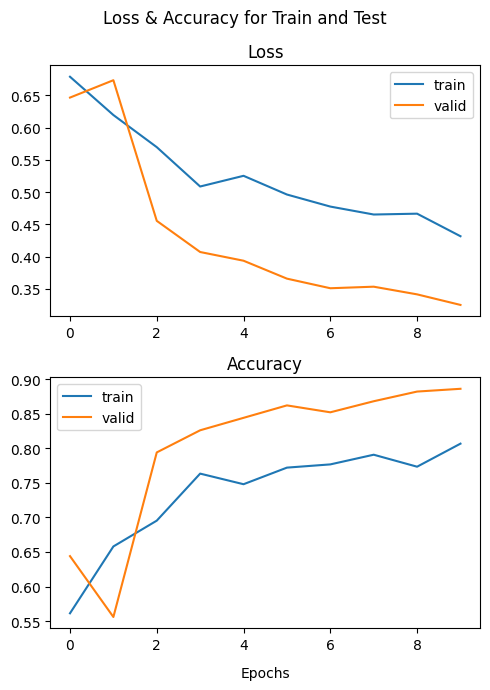

In [ ]:
plot_graph_loss_acc(history_aug)

### Importing an image of a steak or pizza

Checking the accuracy of the model

In [ ]:
# Uploading the file
from google.colab import files
files.upload()

In [ ]:
steak_img = mpimg.imread('/content/R (1).jpg')

(-0.5, 1679.5, 1049.5, -0.5)

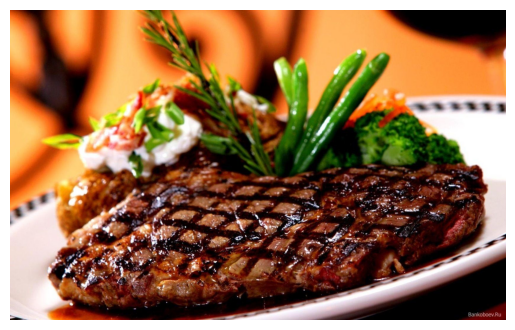

In [ ]:
plt.imshow(steak_img)
plt.axis('off')

In [ ]:
# Checking the shape of our image
steak_img.shape

(1050, 1680, 3)

In [30]:
# Reshaping and resizing our image to our model understandable type
def load_and_prep_img(filename):
  '''
  Reads an image and turns it into tensor and reshapes it to model understandable type
  '''
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = (228, 228))
  # Rescale the image (get all the values between 0 and 1)
  img = img/255.
  # Expanding the dimensions
  img = tf.expand_dims(img, axis = 0)

  return img

In [ ]:
# Loading nd preparing image
img = load_and_prep_img('/content/R (1).jpg')

In [ ]:
predicted_prob = model_aug.predict(img)
predicted_prob

1/1 [==============================] - 0s 18ms/step


Looks like our custom image is bring put through our model, however, it currently ouputs a prediction, lets visualize the image as well as the model's prediction

In [ ]:
from google.colab import files
files.upload()

In [22]:
# Visualizing the percent with the image
def pred_plot(model, filename, class_names = class_names):
  prep_img = load_and_prep_img(filename)
  predicted_prob = model.predict(prep_img)
  prob_percent = tf.squeeze(np.round((abs(50 - predicted_prob))/50, 2)).numpy()
  pred_class = class_names[int(tf.round(predicted_prob))]
  plt.figure(figsize = (5, 5))
  img = tf.squeeze(tf.image.resize(prep_img, size = (228, 228)))
  plt.imshow(img)
  plt.xlabel(f'{pred_class.capitalize()} ({prob_percent * 100:.0f})%', labelpad = 15, fontsize = 12, color = 'green')
  plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  plt.gca().set_xticklabels([])
  plt.gca().set_yticklabels([])

1/1 [==============================] - 0s 17ms/step


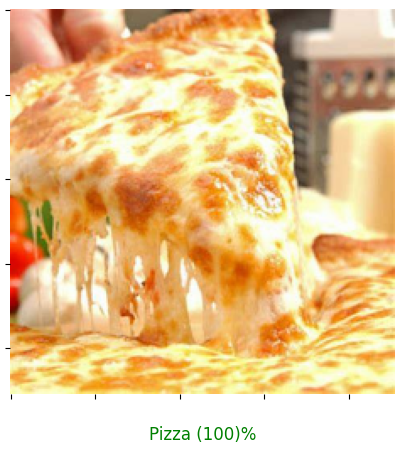

In [ ]:
pred_plot(model_aug, '/content/OIP (1).jpg')

1/1 [==============================] - 0s 19ms/step


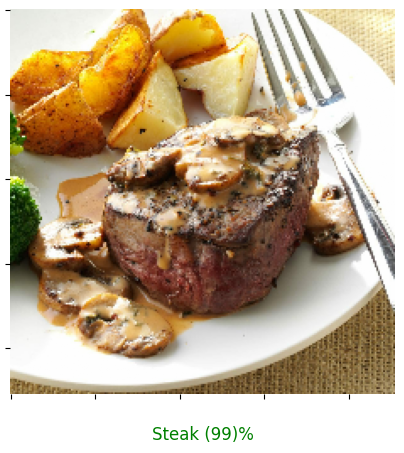

In [ ]:
pred_plot(model_aug, '/content/Tenderloin-Steak-Diane_exps91317_SD142780D08_15_6bC_RMS.jpg')

Model works really good!!!

## Multi class Image classification

* Become one with the data
* Preprocess the data (get it ready for a model)
* Create a model (start with a baseline)
* Fit the model (overfit to make sure it works)
* Evaluate the model
* Adjust different hypermeters and improve the model
* Repeat until satisfied


### Becoming one with the data

In [1]:
## 1. Become one with the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-04-03 07:07:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.3MB/s    in 13s     

2024-04-03 07:07:55 (37.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walkthrough the 10 classes of image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'')

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 1

In [2]:
# Setup train and test dir
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [3]:
import pathlib
import numpy as np

# Let's get the sub directories
def path_names(path):
  data_dir = pathlib.Path(path)
  class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
  print('The categories in {} are: \n'.format('train' if 'test' not in path else 'test'))
  return class_names.tolist()

In [4]:
class_names = path_names(train_dir)
class_names

The categories in train are: 



['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
# Visualizing the data
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_random_img(path, category):
  data_dir = os.path.join(path, category)
  random_img = random.sample(os.listdir(data_dir), 1)
  img = mpimg.imread(data_dir + '/' + random_img[0])
  plt.figure(figsize = (5, 5))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(category.capitalize(), labelpad = 10, fontsize = 12)

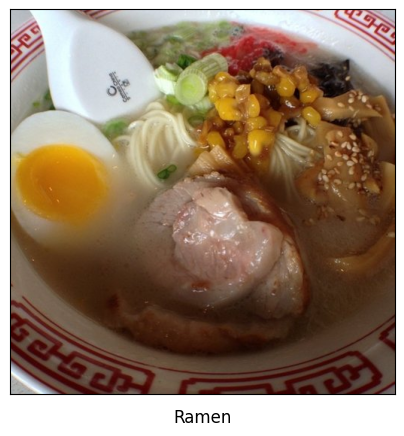

In [7]:
plot_random_img(train_dir, 'ramen')

In [10]:
# Lets plot random image for all the classes
def plot_all_classes(set):
  fig, ax = plt.subplots(5, 2, figsize = (5, 10))
  fig.suptitle('The 12 food classes', fontweight = 'bold', fontsize = 15, y = 0.96, color = 'green')
  for value, object in enumerate(names):
    random_img = random.sample(os.listdir(set + object), 1)
    img = mpimg.imread(os.path.join(set, object) + '/' + random_img[0])
    ax[value // 2, value % 2].imshow(img)
    ax[value // 2, value % 2].set_yticks([])
    ax[value // 2, value % 2].set_xticks([])
    ax[value // 2, value % 2].set_xlabel(object.capitalize(), labelpad = 10)
  plt.tight_layout(rect = [0, 0, 1, 0.95])

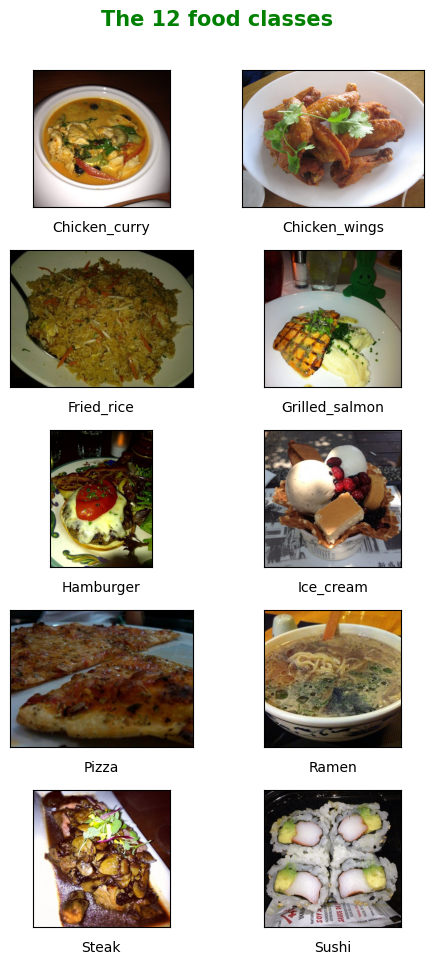

In [12]:
plot_all_classes(train_dir)

### Preprocess the data (preparing it for the model)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling the image
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               (228, 228),
                                               class_mode = 'categorical',
                                               shuffle = True,
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             (228, 228),
                                             class_mode = 'categorical',
                                             shuffle = True,
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with a baseline)

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import CategoricalCrossentropy as CCE
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed as SEED

In [13]:
# Setting the seed
SEED(28)

# Creating the model
model_1 = Sequential(name = 'base_model')
model_1.add(Conv2D(filters = 32,
                   kernel_size = 3,
                   strides = 2,
                   padding = 'valid',
                   input_shape = (228, 228, 3),
                   activation = 'relu'))
model_1.add(Conv2D(32, 2, 1, activation = 'relu'))
model_1.add(MaxPool2D(3, 1))
model_1.add(Conv2D(28, 1, 1, activation = 'relu'))
model_1.add(MaxPool2D(2, 1))
model_1.add(Flatten())
model_1.add(Dense(10, activation = 'softmax'))

# Compiling the model
model_1.compile(loss = CCE(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fitting the model
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 140ms/step - loss: 2.4805 - accuracy: 0.2077 - val_loss: 1.9908 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.9278 - accuracy: 0.3312 - val_loss: 1.9240 - val_accuracy: 0.3136
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 1.6803 - accuracy: 0.4291 - val_loss: 2.0056 - val_accuracy: 0.3220
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.2294 - accuracy: 0.5959 - val_loss: 2.0531 - val_accuracy: 0.3392
Epoch 5/5
235/235 [==============================] - 31s 131ms/step - loss: 0.6342 - accuracy: 0.8068 - val_loss: 2.5020 - val_accuracy: 0.3296


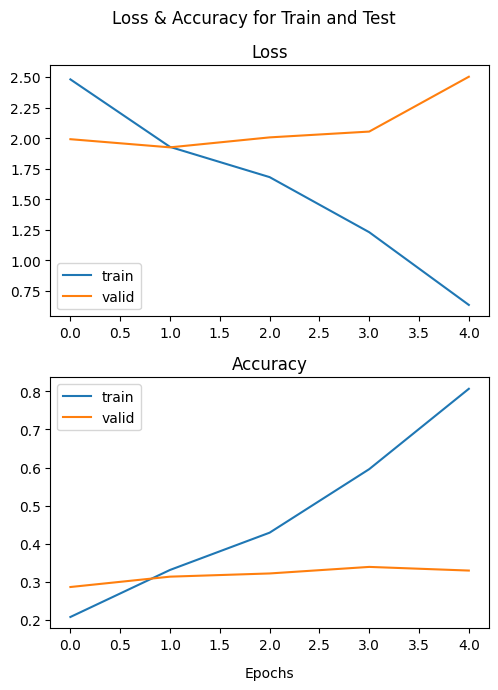

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the model loss graph
plot_graph_loss_acc(history_1)

Our model seems to be overfitting quite badly

### Adjust the hyperparameters to reduce overfitting

* Get more Data
* Simplify the model
* Use Data Augmentation
* Use transfer learning

In [24]:
model_1.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 113, 113, 32)      896       
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 32)      4128      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 110, 110, 28)      924       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 109, 109, 28)      0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 332668)            0

In [25]:
# Let's remove additional conv layers and simplify the model
SEED(28)

model_2 = Sequential()
model_2.add(Conv2D(32, 3, 2, 'valid', input_shape = (228, 228, 3), activation = 'relu'))
model_2.add(MaxPool2D(2))
model_2.add(Flatten())
model_2.add(Dense(10, activation = 'softmax'))

model_2.compile(loss = CCE(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 28s 115ms/step - loss: 2.2095 - accuracy: 0.2724 - val_loss: 1.9745 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.6667 - accuracy: 0.4433 - val_loss: 1.8317 - val_accuracy: 0.3748
Epoch 3/5
235/235 [==============================] - 26s 112ms/step - loss: 1.0753 - accuracy: 0.6856 - val_loss: 1.8487 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.5582 - accuracy: 0.8669 - val_loss: 2.0629 - val_accuracy: 0.3504
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 0.2494 - accuracy: 0.9584 - val_loss: 2.1924 - val_accuracy: 0.3576


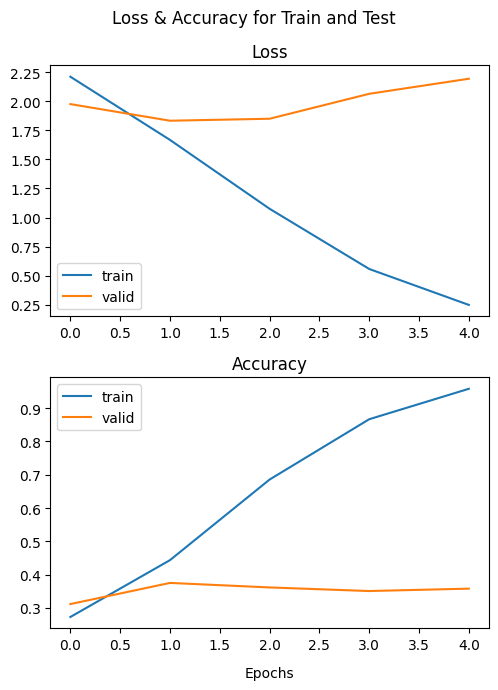

In [26]:
plot_graph_loss_acc(history_2)

In [7]:
# Let's try data augmentation
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.4,
                                       shear_range = 0.4,
                                       zoom_range = 0.4,
                                       horizontal_flip = True,
                                       height_shift_range = 0.4, width_shift_range = 0.4)

In [8]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       (228, 228),
                                                       class_mode = 'categorical',
                                                       shuffle = True,
                                                       batch_size = 32)

Found 7500 images belonging to 10 classes.


In [ ]:
# Creating a new model with the base model features

SEED(28)

model_3 = Sequential()
model_3.add(Conv2D(32, 3, 1, 'valid', input_shape = (228, 228, 3), activation = 'relu'))
model_3.add(MaxPool2D(1))
model_3.add(Conv2D(32, 2, 1, activation = 'relu'))
model_3.add(MaxPool2D(1))
model_3.add(Conv2D(28, 1, 1, activation = 'relu'))
model_3.add(MaxPool2D(1))
model_3.add(Conv2D(10, 1, 1, activation = 'relu'))
model_3.add(MaxPool2D(1))
model_3.add(Flatten())
model_3.add(Dense(10, activation = 'softmax'))

model_3.compile(loss = CCE(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_aug, epochs = 10, steps_per_epoch = len(train_data_aug), validation_steps = len(test_data), validation_data = test_data)

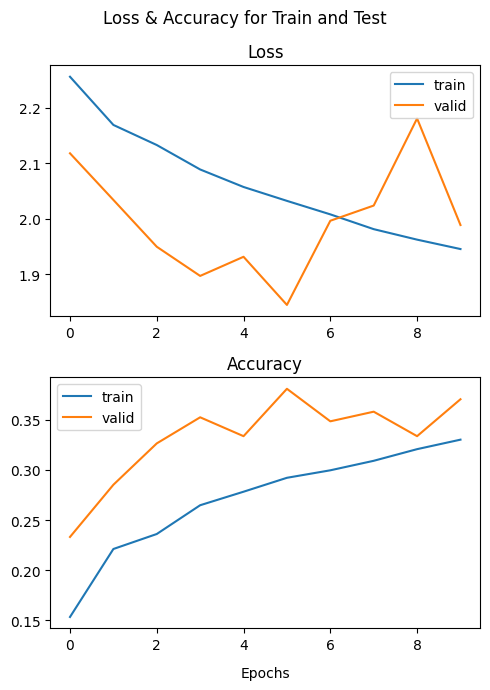

In [14]:
plot_graph_loss_acc(history_3)

In [ ]:
from google.colab import files
files.upload()

In [40]:
img = load_and_prep_img('/content/chicken-curry-11.jpg')

In [35]:
# Visualizing the percent with the image
def pred_plot(model, filename, class_names = class_names):
  prep_img = load_and_prep_img(filename)
  predicted_prob = model.predict(prep_img)
  prob_percent = tf.squeeze(np.max(predicted_prob)).numpy()
  pred_class = class_names[np.argmax(predicted_prob)]
  plt.figure(figsize = (5, 5))
  img = tf.squeeze(tf.image.resize(prep_img, size = (228, 228)))
  plt.imshow(img)
  plt.xlabel(f'{pred_class.capitalize()} ({prob_percent * 100:.1f})%', labelpad = 15, fontsize = 12, color = 'green')
  plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  plt.gca().set_xticklabels([])
  plt.gca().set_yticklabels([])

In [36]:
predicted_prob = model_3.predict(img)

1/1 [==============================] - 0s 206ms/step


1/1 [==============================] - 0s 35ms/step


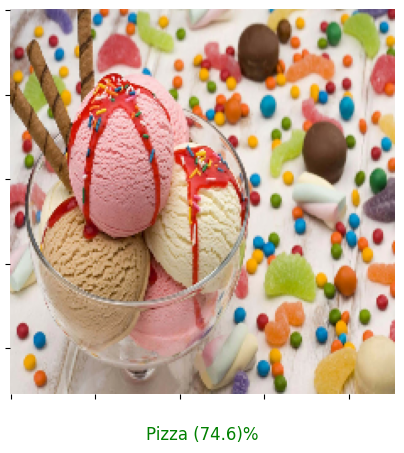

In [43]:
import numpy as np

pred_plot(model_3, '/content/food-sweet-dessert-yummy-ice-cream-images.jpg')

Model is doing very poor!!!